In [13]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 22})

import seaborn as sns

import joblib
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # for feature selection

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



In [14]:
train = r'/content/KDDTrain+.txt'
test = r'/content/KDDTest+.txt'
test21 = r'/content/KDDTest-21.txt'

In [15]:
#DEFINING DATA STRUCTURES
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flag=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_type=['tcp','udp','icmp']

service=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}

In [16]:
#LOADING DATASET FROM CSV FILES TO PANDAS DATAFRAME
train_data=pd.read_csv(train, names=feature)
test_data=pd.read_csv(test, names=feature)
test_21 = pd.read_csv(test21, names= feature)

In [17]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [18]:
#remove attribute 'difficulty_level'
train_data.drop(['difficulty'], axis=1, inplace=True)
train_data.shape

(125973, 42)

In [19]:
#checking data type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [20]:
#describe
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#checking class distribution
train_data['label'].value_counts()

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [22]:
def bar_graph(feature):
    train_data[feature].value_counts().plot(kind="bar")

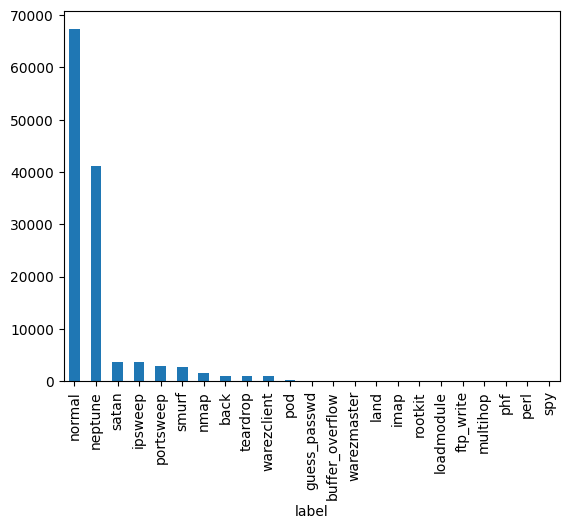

In [23]:
bar_graph('label')

In [24]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [25]:
change_label(train_data)

In [26]:
train_data.label.value_counts()

label
normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

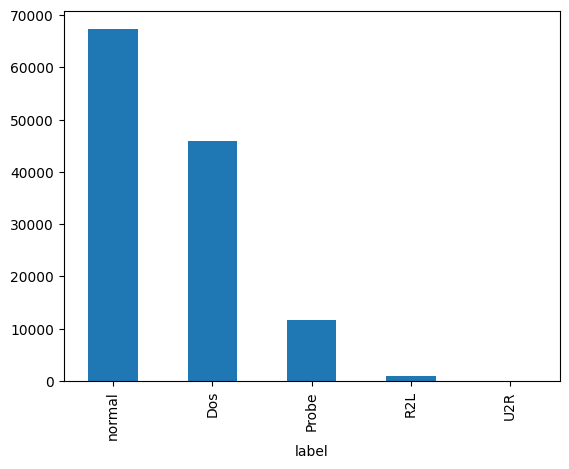

In [27]:
bar_graph('label')

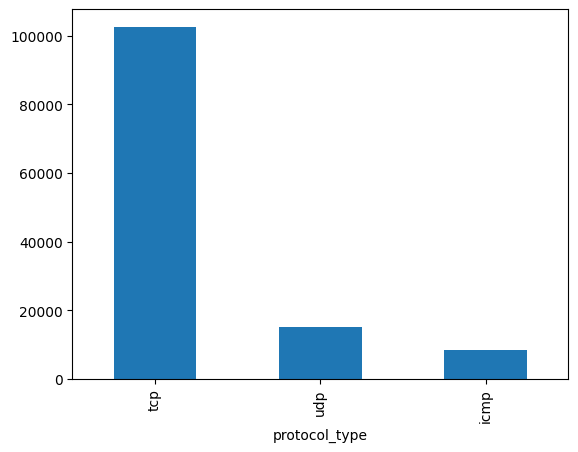

In [28]:
bar_graph('protocol_type')

In [29]:
services_frequency = train_data['service'].value_counts()
subsetServices = list(services_frequency[:30].index)
services_frequency

service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

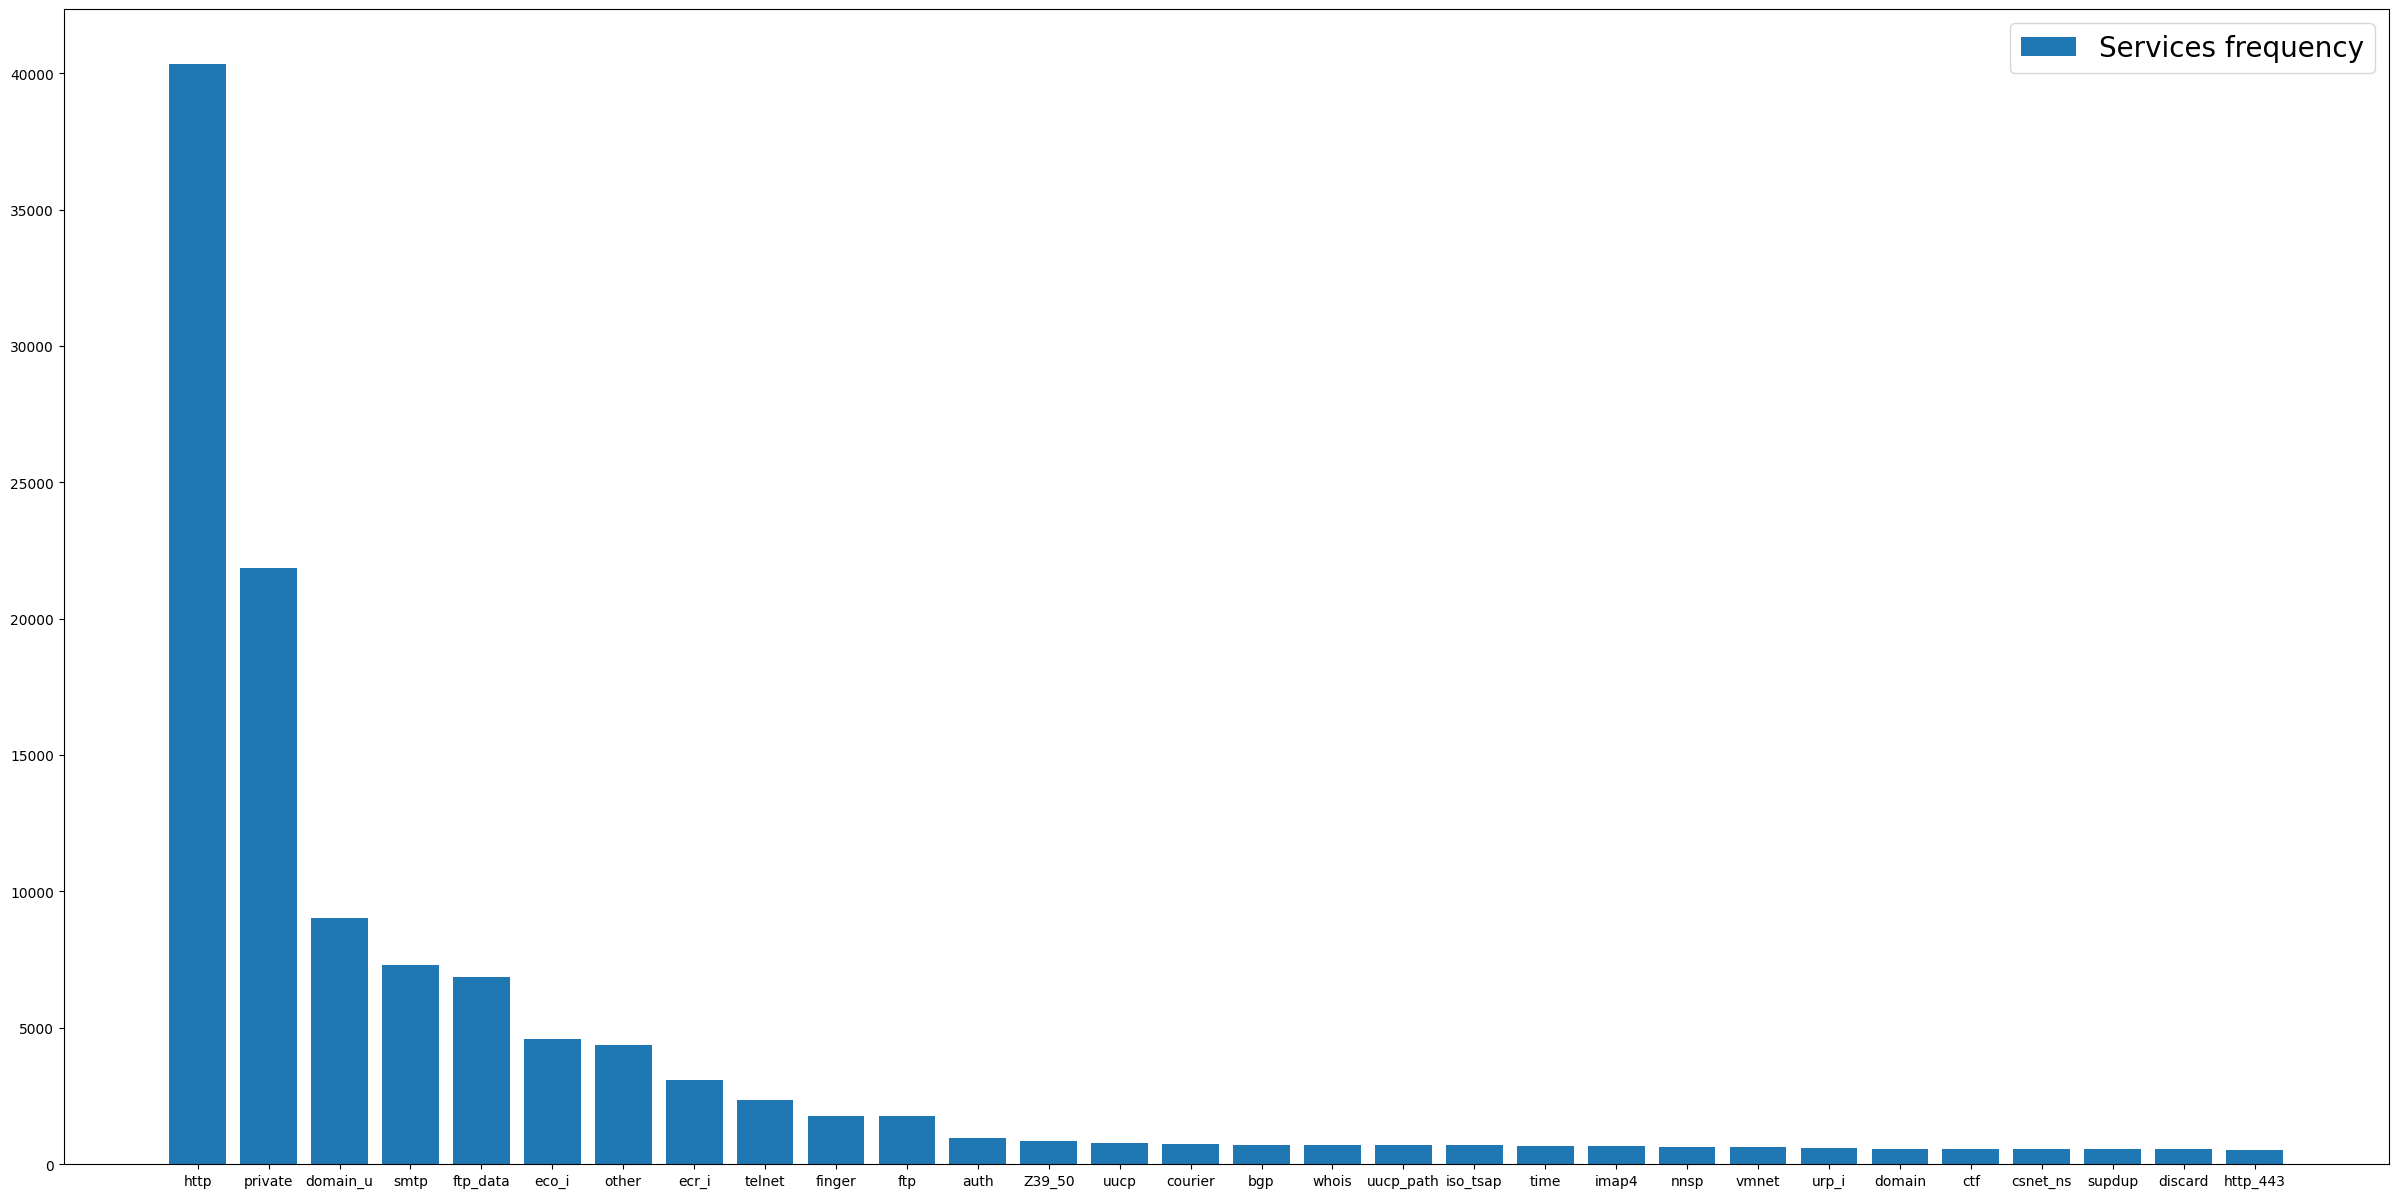

In [30]:
import matplotlib .pyplot as plt

f, ax = plt.subplots(figsize=(30,15))
plt.bar(subsetServices, services_frequency[:30], label= 'Services frequency')
ax.legend(fontsize=20)

<ipython-input-31-fd895281eeeb>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a =df[feature])


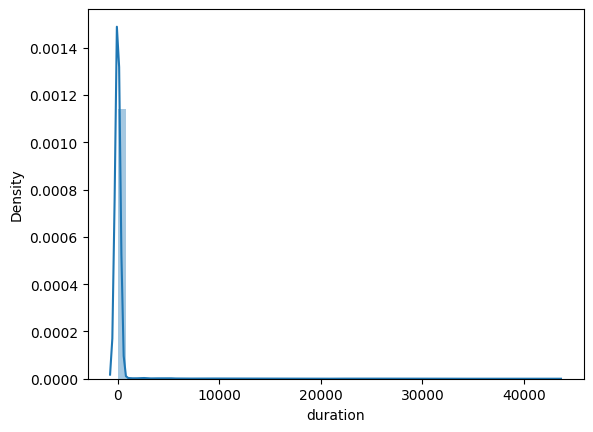

In [31]:
import seaborn as sns
df = train_data['duration']
df = pd.DataFrame(df)
data_feature = df.columns


for feature in data_feature:
    p = sns.distplot(a =df[feature])
    plt.show()

FEATURE ENGINEERING

In [32]:
#BINNING PROCESS
df['binned']=pd.cut(df['duration'], bins=[-0.1, 0, 10000, 20000, 30000, 40000])
df.head()

,duration,binned
0,0,"(-0.1, 0.0]"
1,0,"(-0.1, 0.0]"
2,0,"(-0.1, 0.0]"
3,0,"(-0.1, 0.0]"
4,0,"(-0.1, 0.0]"


In [33]:
df['duration_bin']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000], labels=["0", " (0, 10000]", "(10000, 20000]","(20000, 30000]", "(30000, 40000]"])
df

,duration,binned,duration_bin
0,0,"(-0.1, 0.0]",0
1,0,"(-0.1, 0.0]",0
2,0,"(-0.1, 0.0]",0
3,0,"(-0.1, 0.0]",0
4,0,"(-0.1, 0.0]",0
...,...,...,...
125968,0,"(-0.1, 0.0]",0
125969,8,"(0.0, 10000.0]","(0, 10000]"
125970,0,"(-0.1, 0.0]",0
125971,0,"(-0.1, 0.0]",0


In [34]:
duration_frequency = df['duration_bin'].value_counts()
#subsetsServices = list(duration_frequency[:].index)
duration_frequency

duration_bin
0                 115955
 (0, 10000]         8804
(10000, 20000]       585
(30000, 40000]       281
(20000, 30000]       223
Name: count, dtype: int64

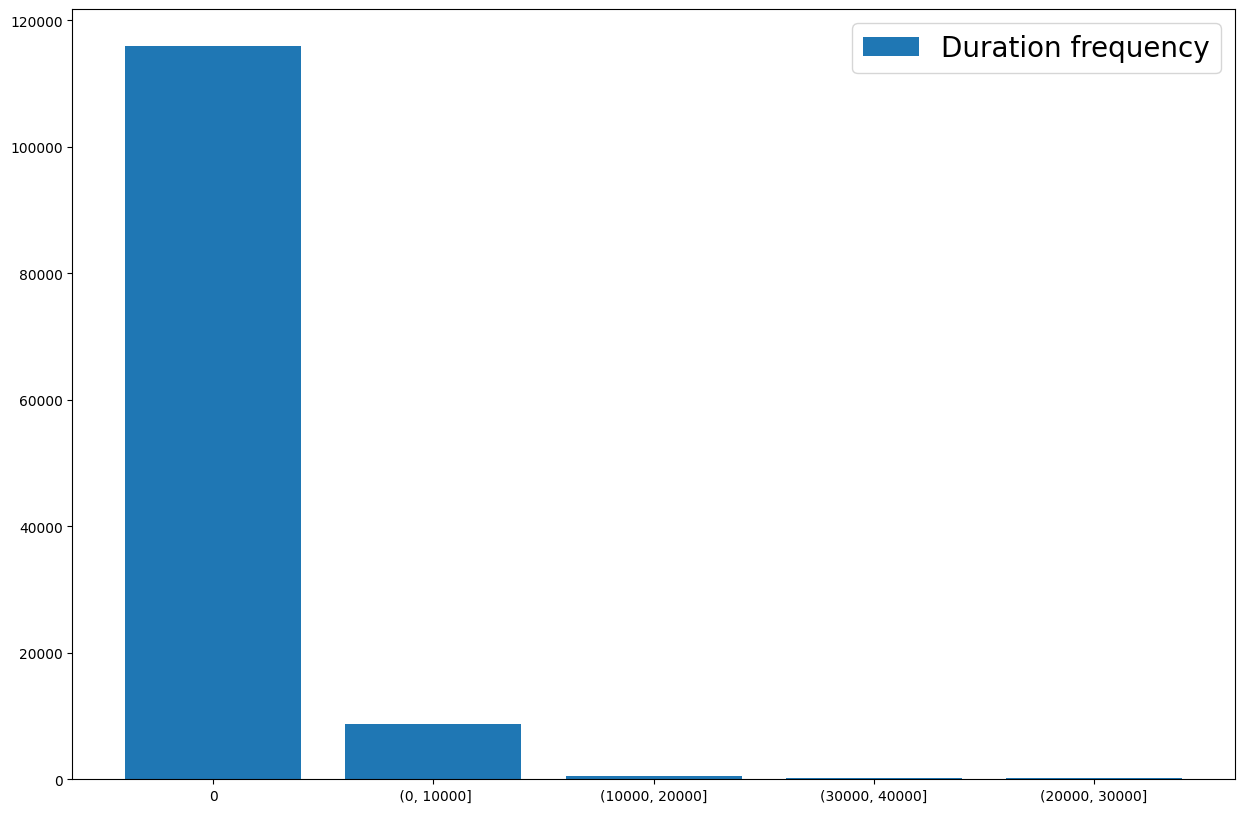

In [35]:
f, ax = plt.subplots(figsize=(15,10)) # set the size that you'd like (width, height)
plt.bar(duration_frequency.index, duration_frequency, label = 'Duration frequency')
ax.legend(fontsize = 20)

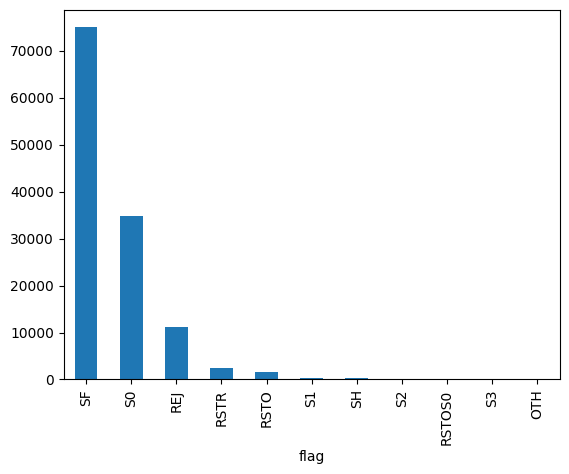

In [36]:
bar_graph('flag')

In [37]:
df = pd.DataFrame(columns=['protocol', 'Attack_class', 'number of sample in Dataset'])

In [38]:
#EXTRACTING UNIQUE PROTOCOLS AND UNIQUE ATTACK LABELS EXCEPT NORMAL TRAFFIC
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique()
Label= np.delete(Label, np.where(Label == 'normal'))


In [39]:
import pandas as pd


for pro in protocols:
  for lab in Label:
    i = len(train_data.loc[(train_data['protocol_type'] == pro) & (train_data['label'] == lab)])
    if i != 0:
      # Create a single-row DataFrame
      row_df = pd.DataFrame({'protocol': pro, 'Attack_class': lab, 'number of sample in Dataset': i}, index=[0])
      # Concatenate with the main DataFrame
      df = pd.concat([df, row_df], ignore_index=True)


In [40]:
df.sort_values(by=['number of sample in Dataset'], ascending=False, ignore_index=True)

,protocol,Attack_class,number of sample in Dataset
0,tcp,Dos,42188
1,tcp,Probe,5857
2,icmp,Probe,4135
3,icmp,Dos,2847
4,udp,Probe,1664
5,tcp,R2L,995
6,udp,Dos,892
7,tcp,U2R,49
8,udp,U2R,3


In [41]:
df_service= pd.DataFrame(columns=['service', 'Attack_class', 'number of sample in Dataset'])

In [42]:
services = list(services_frequency.index)
Label = pd.Series(train_data['label']).unique()
Label= np.delete(Label, np.where(Label == 'normal'))

In [43]:
import pandas as pd



# Empty list to store DataFrames for each service
service_dfs = []

for ser in services:
  # Temporary list to store rows for current service
  service_data = []
  for lab in Label:
    count = len(train_data.loc[(train_data['service'] == ser) & (train_data['label'] == lab)])
    if count != 0:
      # Create a dictionary for the current service and label
      row_dict = {'service': ser, 'Attack_class': lab, 'number of sample in Dataset': count}
      # Append the dictionary to the temporary list
      service_data.append(row_dict)

  # Check if any data collected for the service
  if service_data:
    # Create a DataFrame from the list of dictionaries
    df_temp = pd.DataFrame(service_data)
    # Append the service-specific DataFrame to the main list
    service_dfs.append(df_temp)

# Concatenate all DataFrames in the list
df_service = pd.concat(service_dfs, ignore_index=True)


In [44]:
df_service.sort_values(by=['number of sample in Dataset'], ascending=False)

,service,Attack_class,number of sample in Dataset
3,private,Dos,15971
4,private,Probe,4900
12,eco_i,Probe,4089
17,ecr_i,Dos,2844
0,http,Dos,2255
...,...,...,...
90,login,R2L,2
128,http_8001,Probe,2
129,aol,Probe,2
114,IRC,Probe,1


In [45]:
SP= pd.crosstab(train_data.service,train_data['protocol_type'],margins=True).T.style.background_gradient(cmap='summer_r')
SP


service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,harvest,hostnames,http,http_2784,http_443,http_8001,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4586,3077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,8,0,10,602,0,0,0,0,8291
tcp,187,73,862,2,955,710,734,545,563,521,538,569,0,434,0,0,485,474,1767,1754,6860,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,0,1871,5,78,264,69,18562,0,78,86,65,7313,245,311,381,544,477,2353,0,0,654,0,0,780,689,617,693,102689
udp,0,0,0,0,0,0,0,0,0,0,0,0,9043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,2488,0,0,0,0,3291,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,14993
All,187,73,862,2,955,710,734,545,563,521,538,569,9043,434,4586,3077,485,474,1767,1754,6860,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,168,4359,5,78,264,69,21853,8,78,86,65,7313,245,311,381,544,477,2353,3,8,654,10,602,780,689,617,693,125973


MMULTIVARIATE ANALYSIS

ProtocolType, Services, Label

In [46]:
df= pd.DataFrame(columns=['protocol', 'service', 'label', 'number of sample in Dataset'])

In [47]:
import pandas as pd

# Assuming services is already a list (as per my previous code)

protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique()

# Empty list to store DataFrames for each service-protocol combination
data_dfs = []

for ser in services:
  for pro in protocols:
    # Filter data for current service and protocol
    filtered_data = train_data.loc[(train_data['service'] == ser) & (train_data['protocol_type'] == pro)]

    # Check if any data found (avoid empty DataFrames)
    if not filtered_data.empty:
      # Calculate count for each label in the filtered data
      label_counts = filtered_data['label'].value_counts().reset_index()
      label_counts.columns = ['label', 'number of sample in Dataset']

      # Add service and protocol information as new columns
      label_counts['service'] = ser
      label_counts['protocol'] = pro

      # Append the DataFrame to the list
      data_dfs.append(label_counts)

# Concatenate all DataFrames in the list
df = pd.concat(data_dfs, ignore_index=True)


In [48]:
df.sort_values(by=['number of sample in Dataset'], ascending=False)

,label,number of sample in Dataset,service,protocol
0,normal,38049,http,tcp
4,Dos,15079,private,tcp
10,normal,9034,domain_u,udp
12,normal,7029,smtp,tcp
15,normal,4984,ftp_data,tcp
...,...,...,...,...
112,R2L,2,login,tcp
159,Probe,2,http_8001,tcp
160,Probe,2,aol,tcp
138,Probe,1,IRC,tcp


DATA PREPARATION
*For binary and multiclass classification
*Label encoding with One-Hot

In [49]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [50]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [51]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = train_data.copy()
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal


In [52]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,1
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,1
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0


In [53]:
# one-hot-encoding attack label
#numeric_bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="")
bin_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
#bin_data['label'] = bin_label
bin_data['intrusion'] =enc_label

bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
125969,8,105,145,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
125970,0,2231,384,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
125971,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0


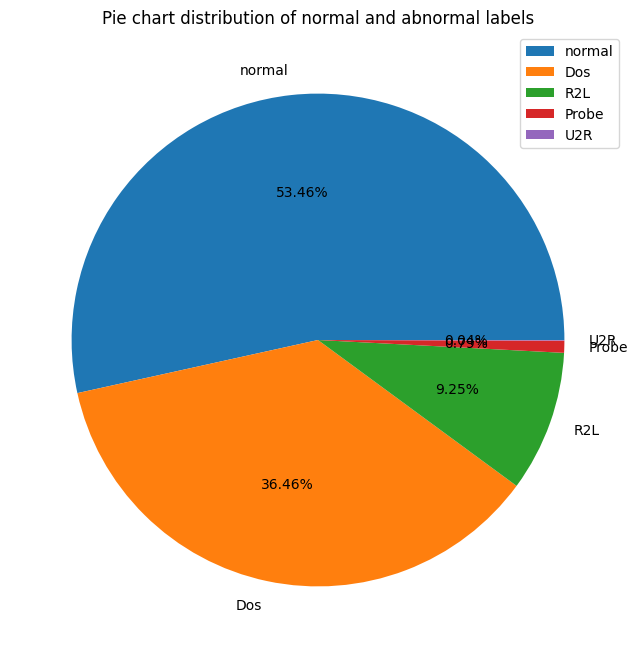

In [54]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()


In [55]:
bin_data_train = bin_data.copy()
bin_data_train.drop(labels=['label'], axis=1, inplace=True)
bin_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
125969,8,105,145,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
125970,0,2231,384,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
125971,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0


In [56]:
numeric_col = train_data.select_dtypes(include='number').columns
numeric_bin_data = train_data[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']

<ipython-input-56-de57208dc97f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin_data['intrusion'] = bin_data['intrusion']


In [57]:
numeric_bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [58]:
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)
multi_label

,label
0,normal
1,normal
2,Dos
3,normal
4,normal
...,...
125968,Dos
125969,normal
125970,normal
125971,Dos


In [59]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,4
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,4
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0


In [60]:
multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag','label'],prefix="",prefix_sep="")
multi_data['label'] = multi_label
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal,label
0,0,491,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,True,normal
1,0,146,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,True,normal
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,Dos
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,True,False,False,False,False,False,True,normal
4,0,199,420,0,0,0,0,0,1,0,...,False,False,True,False,False,False,False,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,Dos
125969,8,105,145,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,True,normal
125970,0,2231,384,0,0,0,0,0,1,0,...,False,False,True,False,False,False,False,False,True,normal
125971,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,Dos


In [61]:
# multi_data_train is dataset that is ready for modeling ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-5]
multi_data_train = multi_data.copy()
multi_data_train.drop(labels= [ 'label', 'intrusion' ], axis=1, inplace=True)
multi_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S1,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,True,False,False,False,False,False,True
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
125969,8,105,145,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
125970,0,2231,384,0,0,0,0,0,1,0,...,False,False,False,True,False,False,False,False,False,True
125971,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [62]:
# this data set is include just numeric features with multi labels
#created for feature selection
numeric_multi_data = train_data[numeric_col]
numeric_multi_data['label'] = multi_label
numeric_multi_data = pd.get_dummies(numeric_multi_data,columns=['label'],prefix="",prefix_sep="")
numeric_multi_data

<ipython-input-62-01ad68b87dbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi_data['label'] = multi_label


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,False,False,False,False,True
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
2,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,False,False,False,False,True
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False
125969,8,105,145,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
125970,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.72,0.00,0.01,0.00,False,False,False,False,True
125971,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False


In [63]:
#num_dataset_bin is just include numeric features with binary labels
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin= num_dataset_bin[['intrusion']]
X_train_num_bin= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_num_bin.shape,'\ny_train has shape:',y_train_num_bin.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 1)


In [64]:
#dataset_bin is include hole features (with encoded non numeric features like services, protocol and flag) with binary labels
dataset_bin = bin_data_train.copy()
y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


In [65]:
#num_dataset_multi is just include numeric features with multi-class labels
num_dataset_multi = numeric_multi_data.copy()
y_train_num_multi= num_dataset_multi.loc[:, 'Dos':]
X_train_num_multi= num_dataset_multi.loc[:, :'dst_host_srv_rerror_rate']

print('X_train has shape:',X_train_num_multi.shape,'\ny_train has shape:',y_train_num_multi.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 5)


In [66]:
#dataset_multi is include hole features (with encoded non numeric features like services, protocol and flag) with multi-class labels
dataset_multi = multi_data_train.copy()
y_train_multi= dataset_multi.loc[:, 'Dos':]
X_train_multi= dataset_multi.loc[:, :'SH']

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 5)


In [67]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr= numeric_bin_data.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [68]:
highest_corr_columns= highest_corr.index

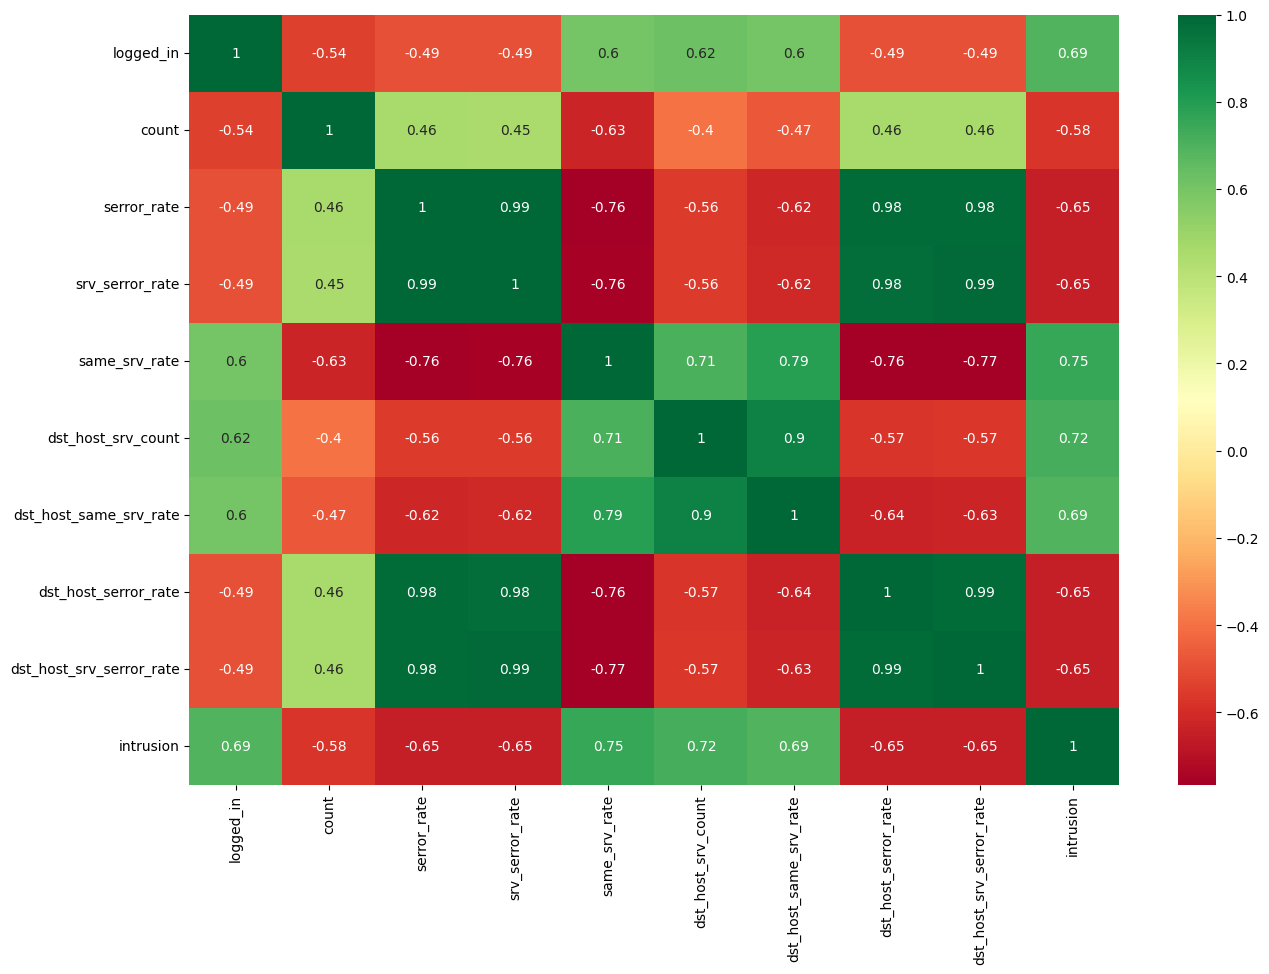

In [69]:
plt.figure(figsize=(15,10))
g=sns.heatmap(bin_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

In [70]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_bin_dataset = numeric_bin_data[highest_corr_columns]
pearson_bin_dataset

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,intrusion
0,0,2,0.0,0.0,1.00,25,0.17,0.00,0.00,1
1,0,13,0.0,0.0,0.08,1,0.00,0.00,0.00,1
2,0,123,1.0,1.0,0.05,26,0.10,1.00,1.00,0
3,1,5,0.2,0.2,1.00,255,1.00,0.03,0.01,1
4,1,30,0.0,0.0,1.00,255,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
125968,0,184,1.0,1.0,0.14,25,0.10,1.00,1.00,0
125969,0,2,0.0,0.0,1.00,244,0.96,0.00,0.00,1
125970,1,1,0.0,0.0,1.00,30,0.12,0.72,0.00,1
125971,0,144,1.0,1.0,0.06,8,0.03,1.00,1.00,0


In [71]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr = numeric_multi_data.corr()
corr_y = abs(corr[y_train_num_multi.columns])
highest_corr = corr_y[corr_y >0.5]
highest_corr

,Dos,Probe,R2L,U2R,normal
duration,NaN,NaN,NaN,NaN,NaN
src_bytes,NaN,NaN,NaN,NaN,NaN
dst_bytes,NaN,NaN,NaN,NaN,NaN
land,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN
hot,NaN,NaN,NaN,NaN,NaN
num_failed_logins,NaN,NaN,NaN,NaN,NaN
logged_in,0.580713,NaN,NaN,NaN,0.690171
num_compromised,NaN,NaN,NaN,NaN,NaN


In [72]:
Dos_features= highest_corr[highest_corr.Dos.notnull()].index
Probe_features= highest_corr[highest_corr.Probe.notnull()].index
R2L_features= highest_corr[highest_corr.R2L.notnull()].index
U2R_features= highest_corr[highest_corr.U2R.notnull()].index
normal_features= highest_corr[highest_corr.normal.notnull()].index

In [73]:
Dos_features.intersection(Probe_features)

Index([], dtype='object')

In [74]:
pearson_multi_features = list(set(Dos_features.union(normal_features).union(Probe_features).union(R2L_features).union(U2R_features)))
for lab in y_train_num_multi.columns:
  pearson_multi_features.remove(lab)
pearson_multi_features

['dst_host_same_src_port_rate',
 'serror_rate',
 'count',
 'dst_host_srv_serror_rate',
 'logged_in',
 'same_srv_rate',
 'srv_serror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'dst_host_same_srv_rate']

In [75]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_multi_dataset = numeric_multi_data[pearson_multi_features]
pearson_multi_dataset

,dst_host_same_src_port_rate,serror_rate,count,dst_host_srv_serror_rate,logged_in,same_srv_rate,srv_serror_rate,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_same_srv_rate
0,0.17,0.0,2,0.00,0,1.00,0.0,25,0.03,0.00,0.17
1,0.88,0.0,13,0.00,0,0.08,0.0,1,0.60,0.00,0.00
2,0.00,1.0,123,1.00,0,0.05,1.0,26,0.05,1.00,0.10
3,0.03,0.2,5,0.01,1,1.00,0.2,255,0.00,0.03,1.00
4,0.00,0.0,30,0.00,1,1.00,0.0,255,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
125968,0.00,1.0,184,1.00,0,0.14,1.0,25,0.06,1.00,0.10
125969,0.01,0.0,2,0.00,0,1.00,0.0,244,0.01,0.00,0.96
125970,0.00,0.0,1,0.00,1,1.00,0.0,30,0.06,0.72,0.12
125971,0.00,1.0,144,1.00,0,0.06,1.0,8,0.05,1.00,0.03


In [76]:
pearson_multi_dataset = pearson_multi_dataset.join(y_train_num_multi)
pearson_multi_dataset

,dst_host_same_src_port_rate,serror_rate,count,dst_host_srv_serror_rate,logged_in,same_srv_rate,srv_serror_rate,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_same_srv_rate,Dos,Probe,R2L,U2R,normal
0,0.17,0.0,2,0.00,0,1.00,0.0,25,0.03,0.00,0.17,False,False,False,False,True
1,0.88,0.0,13,0.00,0,0.08,0.0,1,0.60,0.00,0.00,False,False,False,False,True
2,0.00,1.0,123,1.00,0,0.05,1.0,26,0.05,1.00,0.10,True,False,False,False,False
3,0.03,0.2,5,0.01,1,1.00,0.2,255,0.00,0.03,1.00,False,False,False,False,True
4,0.00,0.0,30,0.00,1,1.00,0.0,255,0.00,0.00,1.00,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.00,1.0,184,1.00,0,0.14,1.0,25,0.06,1.00,0.10,True,False,False,False,False
125969,0.01,0.0,2,0.00,0,1.00,0.0,244,0.01,0.00,0.96,False,False,False,False,True
125970,0.00,0.0,1,0.00,1,1.00,0.0,30,0.06,0.72,0.12,False,False,False,False,True
125971,0.00,1.0,144,1.00,0,0.06,1.0,8,0.05,1.00,0.03,True,False,False,False,False


In [77]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#feature selection of all features (numeric and categorical features)
chi_scores = chi2(X_train_bin,y_train_bin)
chi_scores

(array([7.08280969e+06, 3.34032490e+09, 1.74609581e+09, 6.51239512e+00,
        3.28272717e+03, 1.81710838e+00, 4.87618999e+02, 2.97369498e+00,
        3.62591460e+04, 2.68943252e+04, 5.17680356e+01, 1.17303524e+02,
        3.25504830e+04, 1.05355586e+03, 1.34709608e+01, 4.09027580e+02,
                   nan, 8.70617585e-01, 1.92525066e+02, 6.52574244e+06,
        1.42326958e+01, 3.73654160e+04, 3.74519039e+04, 6.92353165e+03,
        6.99752801e+03, 2.08265018e+04, 2.69428137e+03, 1.24533866e+03,
        9.57432784e+05, 6.96870490e+06, 2.34477802e+04, 3.19789138e+03,
        6.92743399e+02, 1.90567199e+02, 3.72260458e+04, 3.85444066e+04,
        6.35482480e+03, 6.86709925e+03, 4.72870818e+03, 6.57169092e+01,
        5.23482354e+03, 1.59085746e+02, 4.30897575e+01, 9.90101757e+02,
        2.29721985e+00, 3.17181626e+02, 8.15513048e+02, 8.43079686e+02,
        6.25992410e+02, 6.46667389e+02, 5.98425772e+02, 6.17952141e+02,
        5.00464631e+02, 7.83935970e+03, 4.98496708e+02, 3.348288

In [78]:
p_values = pd.Series(chi_scores[1],index = X_train_bin.columns)

p_values.sort_values(ascending = False , inplace = True)

In [79]:
#select 20 best features
p_values = p_values[:20]

<Axes: >

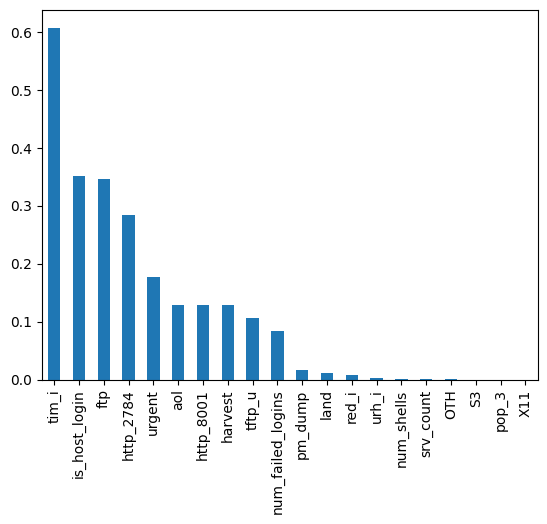

In [80]:
p_values.plot.bar()

In [81]:
#feature selection of numeric features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_num_bin,y_train_num_bin)

In [82]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_num_bin.columns)

In [83]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,duration,7.082810e+06
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
3,land,6.512395e+00
4,wrong_fragment,3.282727e+03
5,urgent,1.817108e+00
6,hot,4.876190e+02
7,num_failed_logins,2.973695e+00
8,logged_in,3.625915e+04
9,num_compromised,2.689433e+04


In [84]:
data_chi2_10best = pd.DataFrame(featureScores.nlargest(10,'Score'))  #print 10 best features
data_chi2_10best

,Specs,Score
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
0,duration,7.082810e+06
29,dst_host_srv_count,6.968705e+06
19,count,6.525742e+06
28,dst_host_count,9.574328e+05
35,dst_host_srv_serror_rate,3.854441e+04
22,srv_serror_rate,3.745190e+04
21,serror_rate,3.736542e+04
34,dst_host_serror_rate,3.722605e+04


In [85]:
data_chi2_10best = list(data_chi2_10best['Specs'])

In [86]:
Chi2_dataset = X_train_num_bin[data_chi2_10best]
Chi2_dataset

,src_bytes,dst_bytes,duration,dst_host_srv_count,count,dst_host_count,dst_host_srv_serror_rate,srv_serror_rate,serror_rate,dst_host_serror_rate
0,491,0,0,25,2,150,0.00,0.0,0.0,0.00
1,146,0,0,1,13,255,0.00,0.0,0.0,0.00
2,0,0,0,26,123,255,1.00,1.0,1.0,1.00
3,232,8153,0,255,5,30,0.01,0.2,0.2,0.03
4,199,420,0,255,30,255,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,25,184,255,1.00,1.0,1.0,1.00
125969,105,145,8,244,2,255,0.00,0.0,0.0,0.00
125970,2231,384,0,30,1,255,0.00,0.0,0.0,0.72
125971,0,0,0,8,144,255,1.00,1.0,1.0,1.00


In [87]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_multi,y_train_multi)

ExtraTreesClassifier()

In [88]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[2.05045987e-03 2.48841464e-02 4.94521164e-03 4.15368817e-05
 1.04352855e-02 1.97595080e-05 7.08672320e-03 2.52938975e-04
 3.75283151e-02 4.78561914e-03 2.21361536e-04 3.60251642e-05
 3.62977464e-04 1.32758139e-04 5.42252422e-05 8.06480043e-05
 0.00000000e+00 6.83993839e-09 7.97974096e-04 3.94945723e-02
 1.23901727e-02 3.82117952e-02 6.34785105e-02 1.28319348e-02
 1.20861618e-02 5.69474417e-02 2.25404866e-02 9.13098567e-03
 1.55660757e-02 3.40611915e-02 4.36899080e-02 3.05478397e-02
 3.06570901e-02 1.10122500e-02 5.95186923e-02 4.88532559e-02
 1.74115492e-02 2.01027877e-02 2.58512827e-02 1.45932138e-02
 9.15621066e-03 6.82364385e-04 7.39622894e-05 1.51147846e-04
 4.39509147e-07 1.56088101e-04 1.60079977e-05 9.79932431e-05
 4.71670129e-06 2.56705899e-05 1.54638681e-05 8.06665995e-06
 4.99716624e-05 7.69332823e-03 1.49667279e-05 1.78739913e-02
 1.93652339e-02 2.31013565e-06 1.35009943e-06 3.18010301e-04
 8.98725159e-04 3.27727404e-03 9.46199650e-05 4.76841131e-07
 1.64067107e-07 2.000093

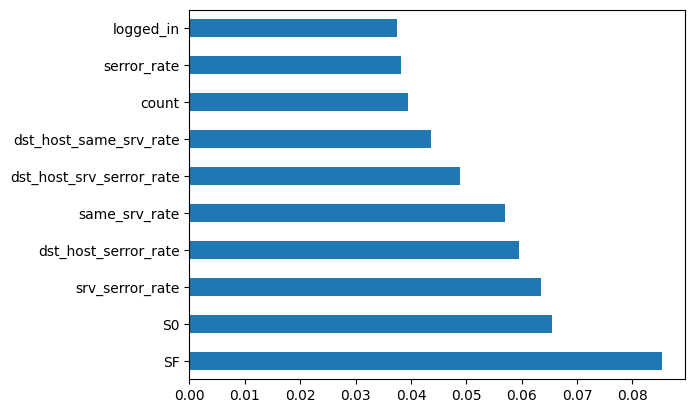

In [89]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_multi.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [90]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_num_multi,y_train_num_multi)

ExtraTreesClassifier()

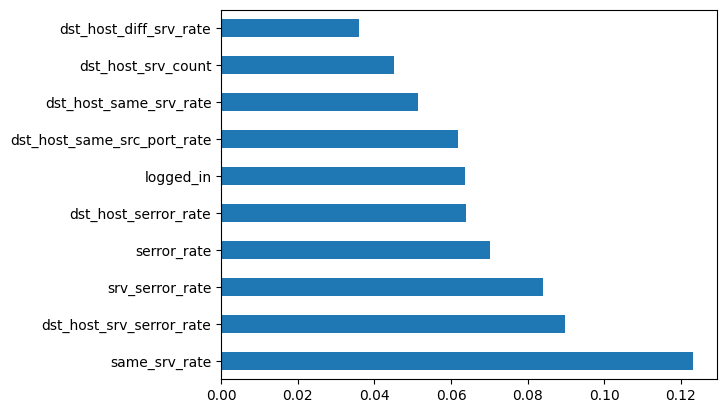

In [91]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_num_multi.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [92]:
# selecting numeric attributes columns from data
numeric_col = train_data.select_dtypes(include='number').columns

In [93]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [94]:
#data before normalization
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [95]:
# calling the normalization() function
data = standardization(train_data.copy(),numeric_col)

In [96]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [97]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [98]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [99]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [100]:
Normalized_dataset = pd.concat([categorical, data],axis=1)
Normalized_dataset.drop(labels=cat_col, axis=1, inplace=True)

In [101]:
#Normalized_dataset = pd.get_dummies(Normalized_dataset, columns=Normalized_dataset['label'])
#Normalized_dataset
X = Normalized_dataset.loc[:,:'dst_host_srv_rerror_rate']
y_bin = numeric_bin_data['intrusion']

In [102]:
y_multi = multi_data['label']

In [103]:
from sklearn.preprocessing import LabelBinarizer

y_multi = LabelBinarizer().fit_transform(y_multi)

In [104]:
y_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [105]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.25, random_state=42)

In [106]:
# using kernel as linear
svm = SVC(kernel='linear',gamma='auto')
svm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [107]:
y_pred = svm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  97.5392138185051


In [108]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.98      0.97      0.97     14720
      normal       0.97      0.98      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.98      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



In [109]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.024607861814948877
Mean Squared Error -  0.024607861814948877
Root Mean Squared Error -  0.1568689319621603
R2 Score -  90.1199801808959
Accuracy -  97.5392138185051


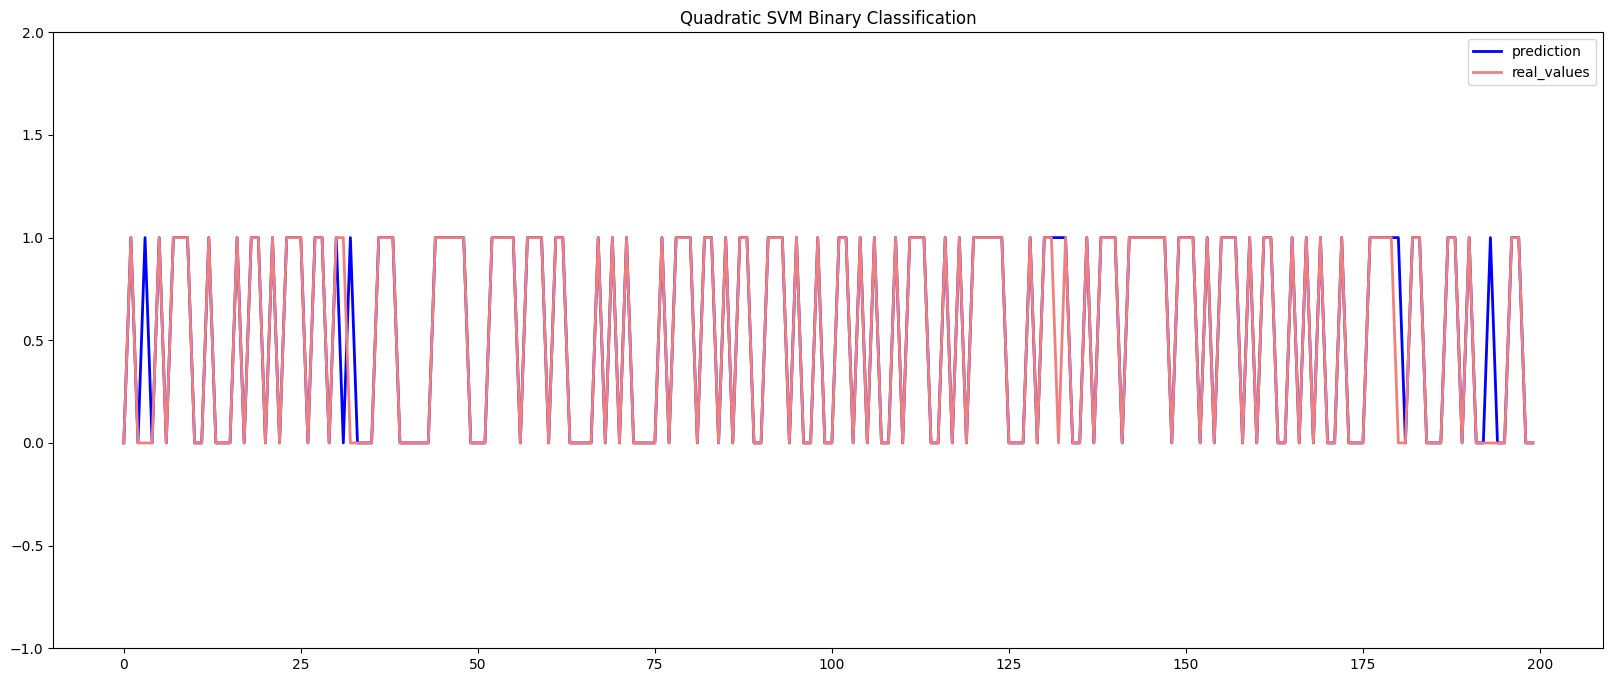

In [110]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
plt.show()

In [111]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [112]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  96.77716390423574


In [113]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.94      0.96     14720
      normal       0.95      1.00      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [114]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03222836095764273
Mean Squared Error -  0.03222836095764273
Root Mean Squared Error -  0.17952259177508195
R2 Score -  87.36508583094437
Accuracy -  96.77716390423574


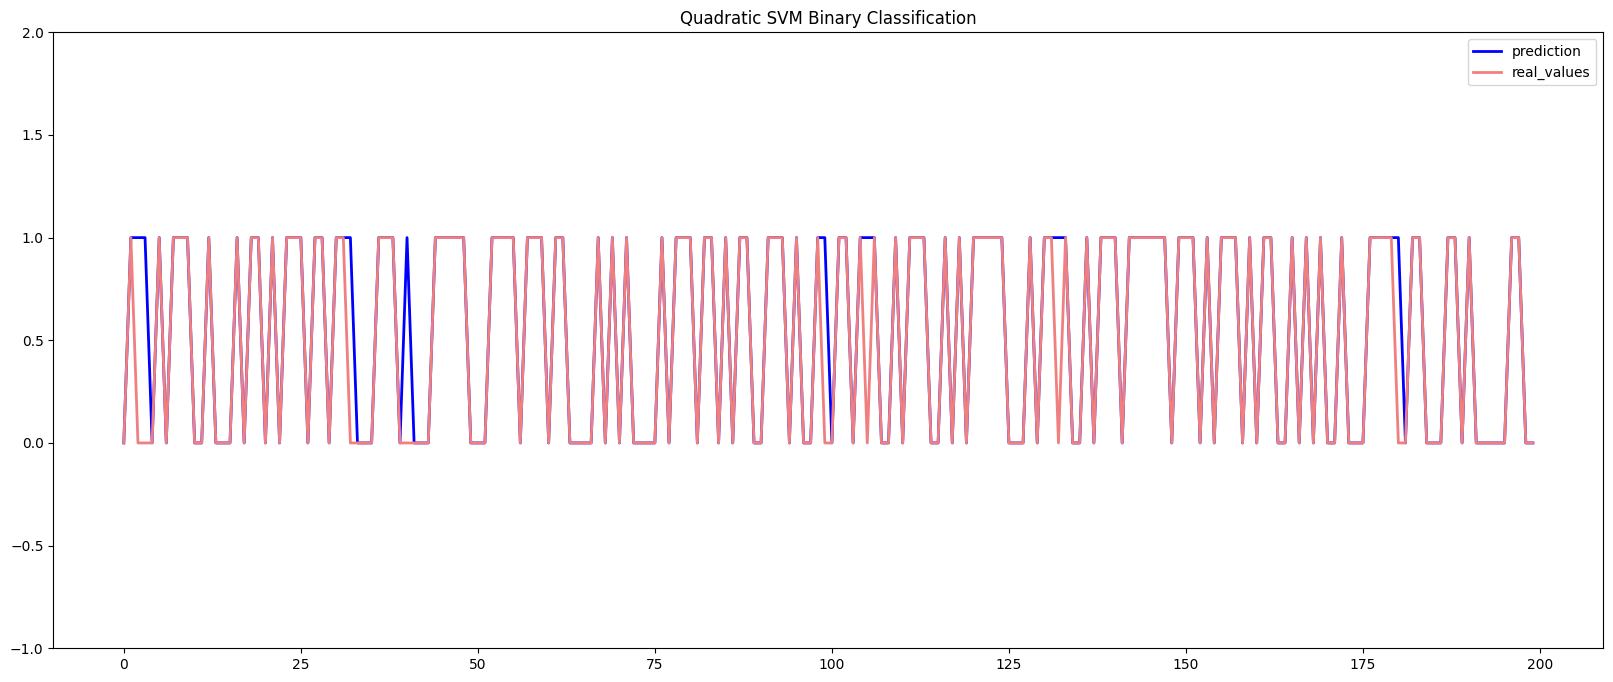

In [115]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
plt.show()

In [116]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [117]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  99.60309900298469


In [118]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00     14720
      normal       1.00      1.00      1.00     16774

    accuracy                           1.00     31494
   macro avg       1.00      1.00      1.00     31494
weighted avg       1.00      1.00      1.00     31494



In [119]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.003969009970153045
Mean Squared Error -  0.003969009970153045
Root Mean Squared Error -  0.06300007912814908
R2 Score -  98.40564711626689
Accuracy -  99.60309900298469


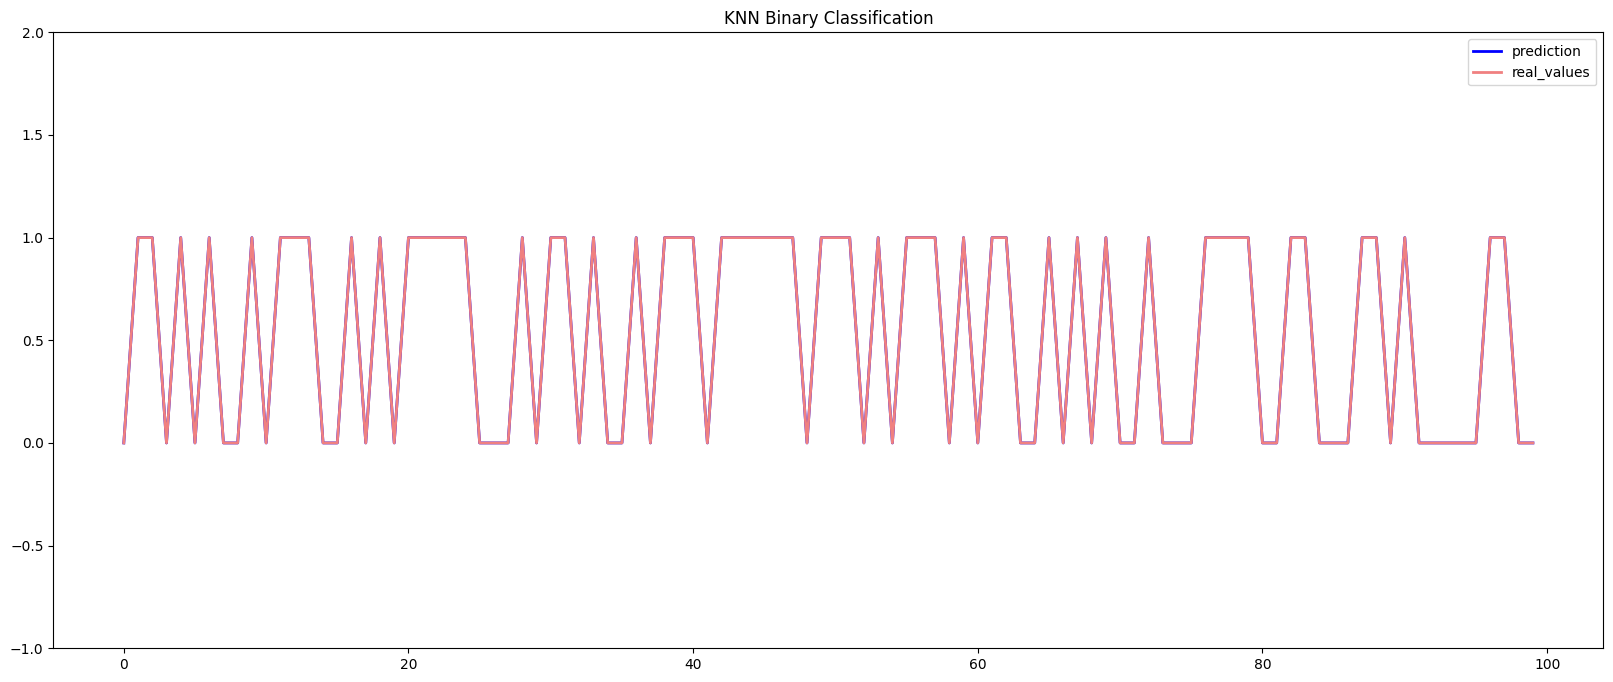

In [120]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("KNN Binary Classification")
plt.show()